# CRITT TPR-DB Data Analysis Demo


In [3]:
pip install tprdbreader

Note: you may need to restart the kernel to use updated packages.


In [4]:
import os
import sys
import os.path
import glob
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from tprdbreader import readTPRDBtable_GCP


# The Session (each text = one text-production session)

In [ ]:
# read SS tables
studies = ["BML12_re"]
ext = "ss"
sessions = readTPRDBtable_GCP(studies, ext, user = "TPRDB", verbose=1)

BML12_re	#sessions: 184	.ss:184


## .ss table: each row is one text-production session

In [55]:
pd.set_option('display.max_columns', None)

sessions.head(10)

,Id,Study,Session,SL,TL,Task,Text,Part,ALseg,STseg,TTseg,Dur,TimeD,TimeR,Break,FDur,TD5000,TD1000,TB1000,FDurSeg,DurSeg,Scatter,FixS,TrtS,FixT,TrtT,Ins,Del,TokS,LenS,TokT,LenT
0,1,BML12_re,P01_E5,en,es,E,5,P01,6,---,---,310234,114139,232656,0,0,75062,23357,29,281250,281250,0.63,3,167,661,68214,85,93,139,788,153,840
1,1,BML12_re,P01_E6,en,es,E,6,P01,7,---,---,434250,27156,416000,0,0,87157,48749,35,428359,428359,0.39,6,368,2381,308456,151,143,139,779,161,941
2,1,BML12_re,P01_P3,en,es,P,3,P01,5,---,---,416468,77547,323547,0,0,27186,16295,14,386953,386953,1.28,548,71980,390,30970,51,48,146,857,162,915
3,1,BML12_re,P01_P4,en,es,P,4,P01,5,---,---,268328,71234,264765,0,0,29407,14472,15,264765,264765,0.05,551,78224,236,18668,77,62,110,668,131,763
4,1,BML12_re,P01_T1,en,es,T,1,P01,11,---,---,757281,92016,525203,0,0,344318,210411,72,847329,847329,0.68,1122,115692,392,26605,1152,186,160,838,181,964
5,1,BML12_re,P01_T2,en,es,T,2,P01,7,---,---,740484,98031,491578,0,0,358421,206464,92,729906,729906,0.38,990,138879,282,25127,1201,142,153,847,186,1057
6,1,BML12_re,P02_E1,en,es,E,1,P02,11,---,---,334313,5828,257344,0,0,109499,46840,37,381001,381001,1.40,3,184,2150,244012,134,104,160,838,182,970
7,1,BML12_re,P02_E2,en,es,E,2,P02,7,---,---,258297,25766,250407,0,0,35720,18611,24,250750,250750,2.49,0,0,1887,189768,52,47,153,847,185,1012
8,1,BML12_re,P02_P5,en,es,P,5,P02,6,---,---,467547,45094,347531,0,0,65266,45000,31,458562,458562,0.91,978,95446,3199,249222,95,109,139,788,150,834
9,1,BML12_re,P02_P6,en,es,P,6,P02,7,---,---,441328,44562,348438,0,0,115598,60737,39,427797,427797,0.67,825,73060,2602,214613,170,174,139,779,159,929


## How many sessions?

In [5]:
sessions.shape

(184, 32)

## Inspect Data Table a bit

In [6]:
x = 'Part'
print(sorted(list(set(sessions[x]))))
print("Number of " + x + "s: " + str(len(set(sessions[x]))))

['P01', 'P02', 'P03', 'P04', 'P05', 'P06', 'P07', 'P08', 'P09', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32']
Number of Parts: 32


## Bar Chart
Graphical representation of categorical data (Counts)
- Production Time per Task
- Total TT Reading Time per Task 
- Total ST Reading Time per Task

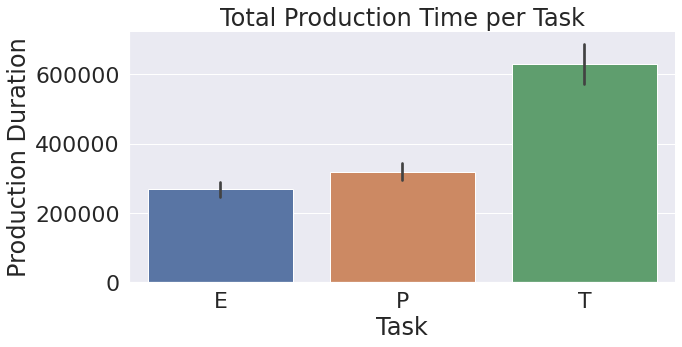

In [5]:
# set font and figure size 
plt.rcParams["figure.figsize"] = (10,10)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
sns.set(font_scale = 2)

# plot Histogram
ax4 = sns.catplot(x="Task",
                 y="Dur",
                 kind="bar",
                 data=sessions,
                 height=5,
                 aspect=2
                )

# add labels
ax4.set(ylabel='Production Duration', xlabel='Task', title='Total Production Time per Task')
plt.show()

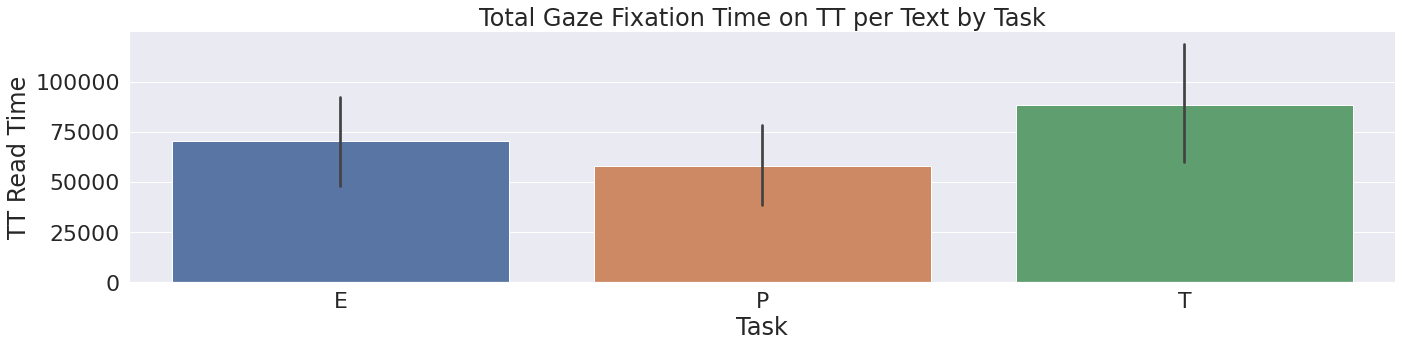

In [45]:
ax3 = sns.catplot(x="Task",
                 y="TrtT",
                 kind="bar",
                 data=sessions,
                 height=5,
                 aspect=4
                )
ax3.set(ylabel='TT Read Time', xlabel='Task', title='Total Gaze Fixation Time on TT per Text by Task')
plt.show()

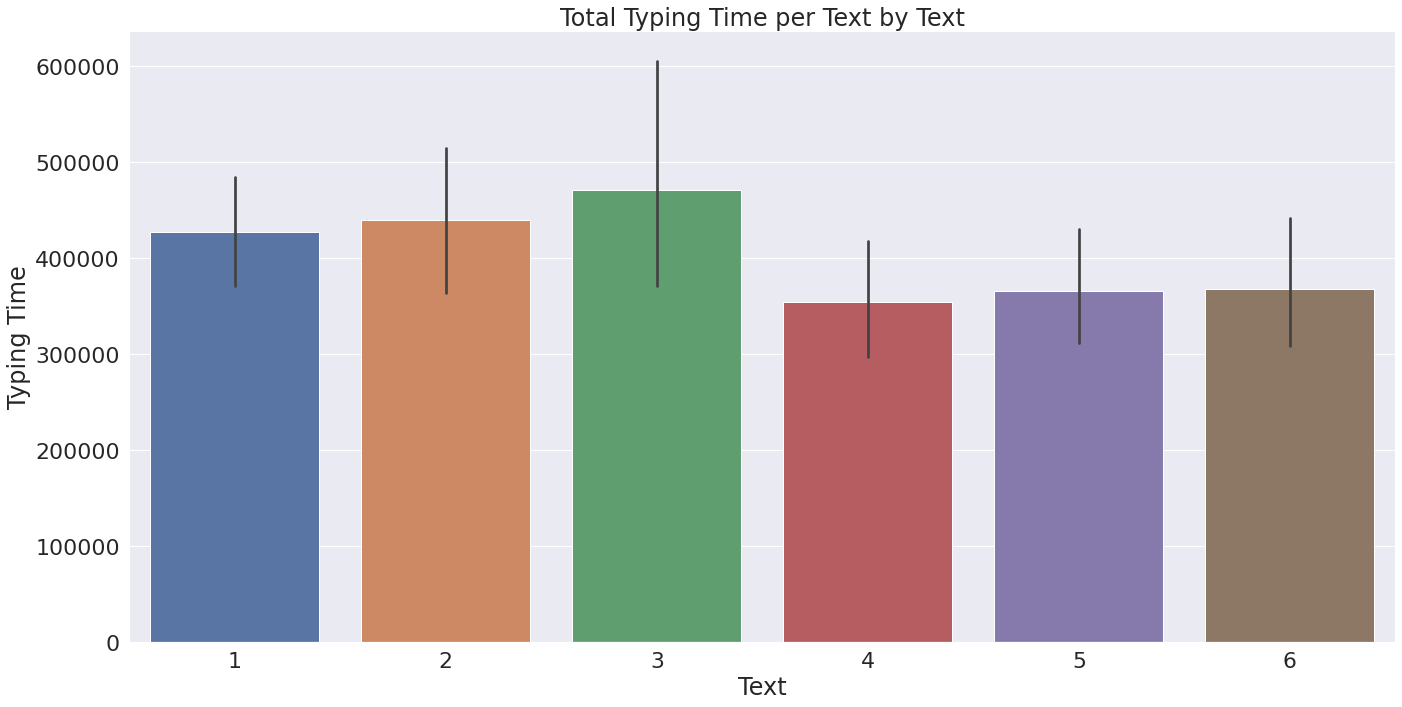

In [47]:
ax4_1 = sns.catplot(x="Text",
                 y="Dur",
                 kind="bar",
                 data=sessions,
                 height=10,
                 aspect=2
                )
ax4_1.set(ylabel='Typing Time', xlabel='Text', title='Total Typing Time per Text')
plt.show()

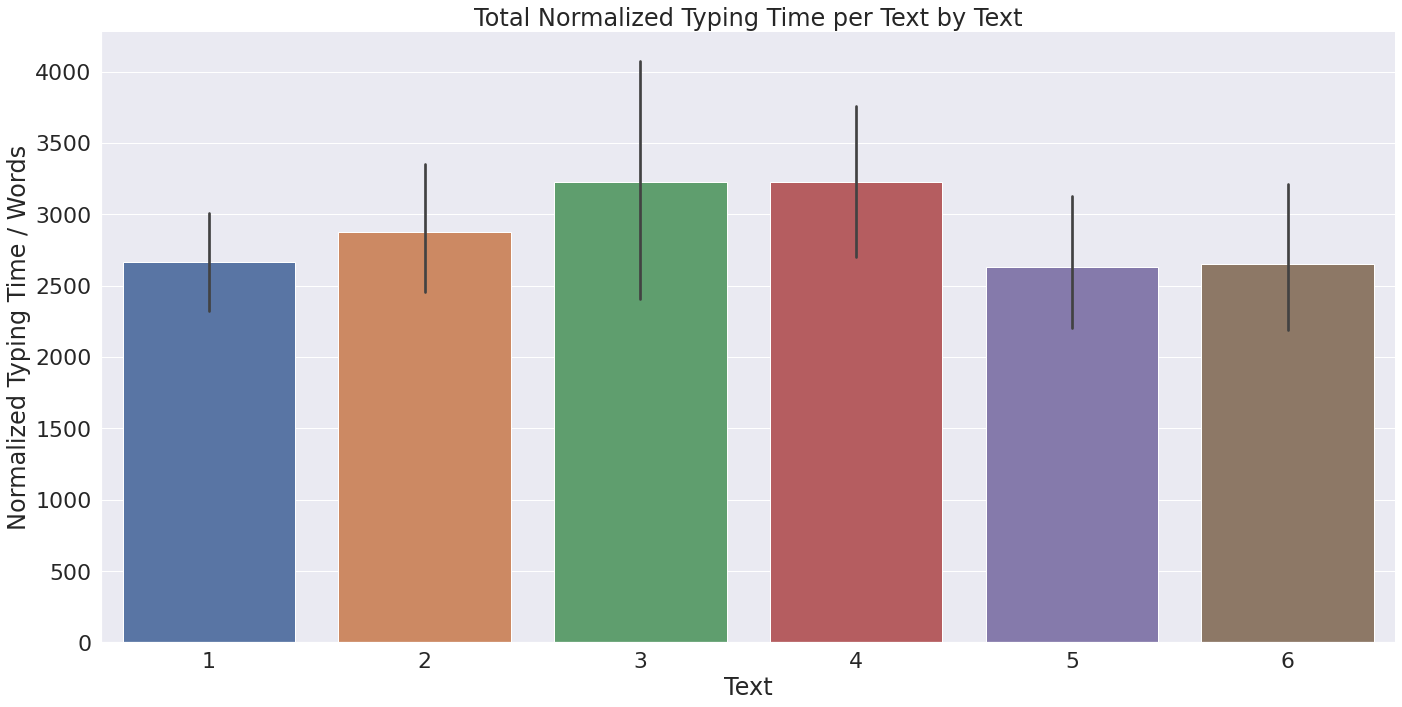

In [13]:
# Normalize typing time 
# time per text divided by number of ST tokens

sns.set(font_scale = 2)

# normalization by #ST token
sessions["nDur"] = sessions["Dur"]/sessions["TokS"]

ax4_2 = sns.catplot(x="Text",
                 y="nDur",
                 kind="bar",
                 data=sessions,
                 height=10,
                 aspect=2
                )
ax4_2.set(ylabel='Normalized Typing Time / Words', xlabel='Text', title='Total Normalized Typing Time per Text by Text')
plt.show()

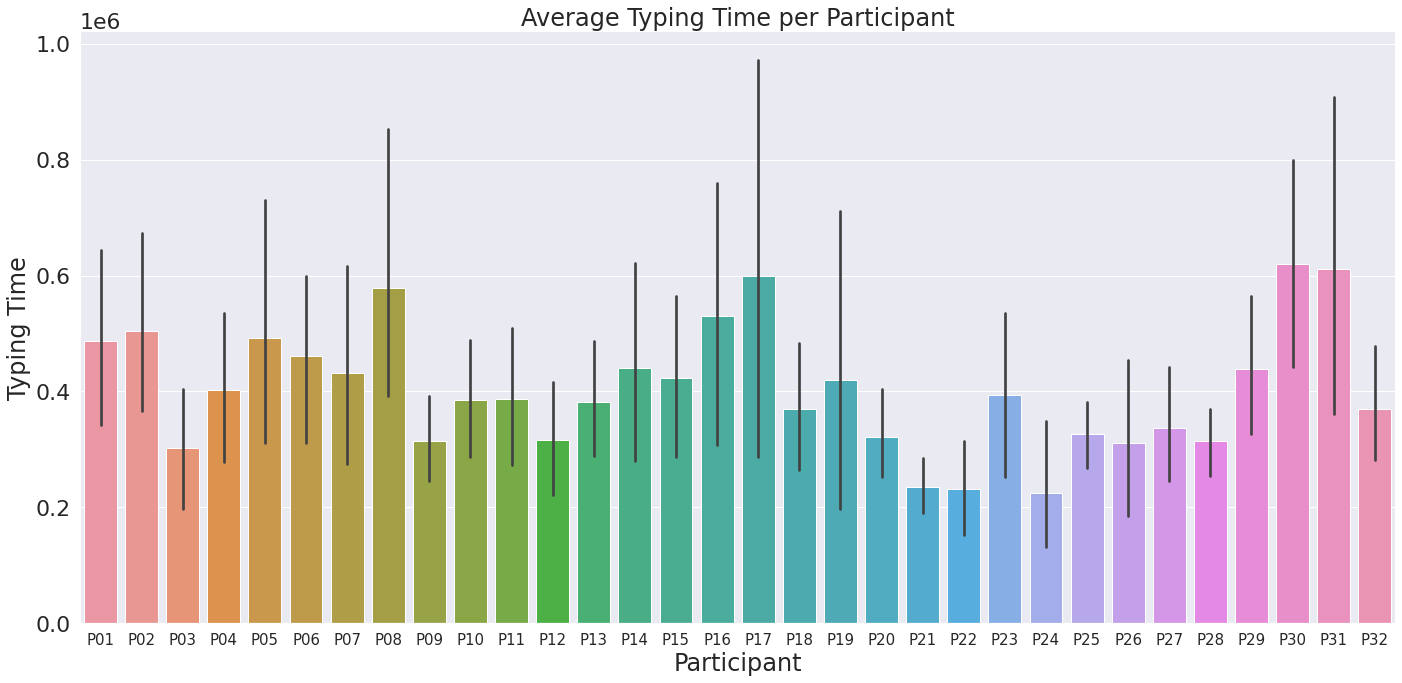

In [6]:
ax5 = sns.catplot(x="Part",
                 y="Dur",
                 kind="bar",
                 data=sessions,
                 height=10,
                 aspect=2
                )
ax5.set(ylabel='Typing Time', xlabel='Participant', title='Average Typing Time per Participant')
ax5.set_xticklabels(size = 15)
plt.show()

## Box Plot
Graphical representation of categorical data (Counts)

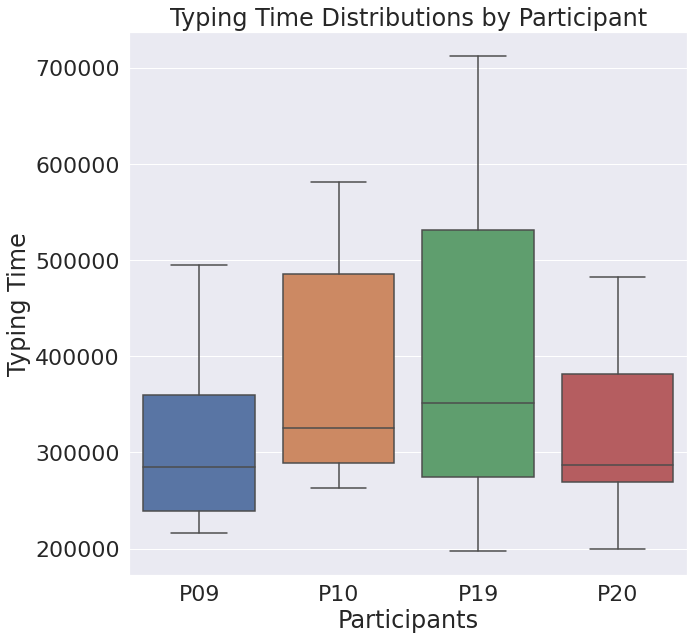

In [44]:
# boxplot per participant
listOfParts = ['P09','P20', 'P10', 'P19']

ax10 = sns.boxplot(x="Part", y="Dur", data=sessions[sessions['Part'].isin(listOfParts)])

ax10.set(ylabel='Typing Time', xlabel='Participants', title='Typing Time Distributions by Participant')

plt.show()

# 